In [1]:
import pyaudio
import wave
from numpy import *
from matplotlib.pyplot import *

def RecordToWav(CHUNK = 1024,FORMAT = pyaudio.paInt16,CHANNELS = 2,RATE = 44100,RECORD_SECONDS = 3,WAVE_OUTPUT_FILENAME = "output.wav"):
    CHUNK = 1024
    FORMAT = pyaudio.paInt16 # int16型
    CHANNELS = 2             # ステレオ
    RATE = 44100             # 441.kHz
    RECORD_SECONDS = 5       # 5秒録音
    WAVE_OUTPUT_FILENAME = "output.wav"

    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("* recording")

    frames = []

    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("* done recording")

    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    
    return WAVE_OUTPUT_FILENAME
    
def Play(wav_name):
    wf = wave.open(wav_name, "r")
    p = pyaudio.PyAudio()
    stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                    channels=wf.getnchannels(),
                    rate=wf.getframerate(),
                    output=True)

    chunk = 1024
    #get_binary num = chunk
    data = wf.readframes(chunk)
    while data != b'':
        stream.write(data)
        data = wf.readframes(chunk)
    stream.close()
    p.terminate()
    wf.close()

def printWaveInfo(wav_name):
    wf = wave.open(wav_name, "r")
    """WAVEファイルの情報を取得"""
    print("チャンネル数:", wf.getnchannels())
    print("サンプル幅:", wf.getsampwidth())
    print("サンプリング周波数:", wf.getframerate())
    print("フレーム数:", wf.getnframes())
    print("パラメータ:", wf.getparams())
    print("長さ（秒）:", float(wf.getnframes()) / wf.getframerate())
    wf.close()
    
def PlotWav(wav_name):
    wf = wave.open(wav_name, "r")
    buffer = wf.readframes(wf.getnframes())
    #print(buffer)
    print(len(buffer))  # バイト数 = 1フレーム2バイト x フレーム数

    # bufferはバイナリなので2バイトずつ整数（-32768から32767）にまとめる
    data = frombuffer(buffer, dtype="int16")
    print(data)

    # プロット
    plot(data[:510000])
    show()
    wf.close()
    
def PlotSpectrogram(wav_name):
    wf = wave.open(wav_name, "r")
    length = float(wf.getnframes()) / wf.getframerate()
    N = 512
    hammingWindow = hamming(N)
    pxx, freqs, bins, im = specgram(data, NFFT=N, Fs=wf.getframerate(), noverlap=0, window=hammingWindow)
    axis([0, length, 0, wf.getframerate() / 2])
    xlabel("time [second]")
    ylabel("frequency [Hz]")
    show()
    wf.close()

In [23]:
wav_name = RecordToWav()
Play(wav_name)

* recording
* done recording


In [3]:
Play(wav_name)

* recording
* done recording
528384
[ 0  0 -1 ...  2  3  3]


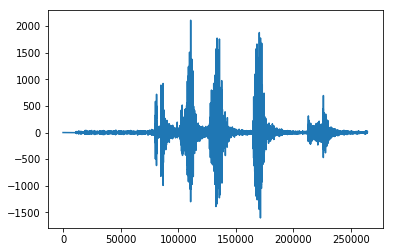

チャンネル数: 2
サンプル幅: 2
サンプリング周波数: 44100
フレーム数: 132096
パラメータ: _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=132096, comptype='NONE', compname='not compressed')
長さ（秒）: 2.995374149659864


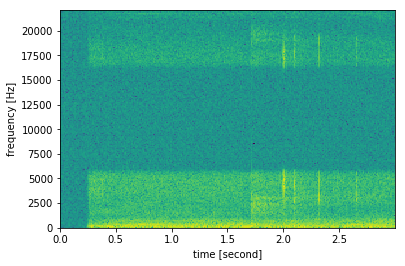

In [27]:
if __name__ == '__main__':
    
    wav_name = RecordToWav()#"Flamingo.wav"
    
    Play(wav_name)
    PlotWav(wav_name)
    printWaveInfo(wav_name)
    PlotSpectrogram(wav_name)

* recording
* done recording
チャンネル数: 2
サンプル幅: 2
サンプリング周波数: 44100
フレーム数: 132096
パラメータ: _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=132096, comptype='NONE', compname='not compressed')
長さ（秒）: 2.995374149659864
528384


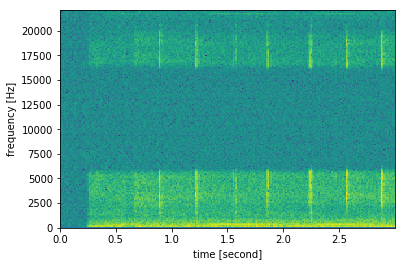

In [8]:
from numpy import *
from pylab import *
if __name__ == '__main__':
    
    RecordToWav()
    wf = wave.open("output.wav", "r")
    printWaveInfo(wf)
    
    buffer = wf.readframes(wf.getnframes())
    print(len(buffer))  # バイト数 = 1フレーム2バイト x フレーム数

    # bufferはバイナリなので2バイトずつ整数（-32768から32767）にまとめる
    data = frombuffer(buffer, dtype="int16")

    # プロット
    plot(data[:510000])
    show()

In [ ]:
def Record(CHUNK = 1024,FORMAT = pyaudio.paInt16,CHANNELS = 2,RATE = 44100,RECORD_SECONDS = 3,WAVE_OUTPUT_FILENAME = "output.wav"):
    import pyaudio
    CHUNK = 1024
    FORMAT = pyaudio.paInt16 # int16型
    CHANNELS = 2             # ステレオ
    RATE = 44100             # 441.kHz
    RECORD_SECONDS = 3       # 5秒録音
    WAVE_OUTPUT_FILENAME = "output.wav"

    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("* recording")

    frames = []

    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("* done recording")

    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()

In [ ]:
CHUNK = 1024,FORMAT = pyaudio.paInt16 ,CHANNELS = 2,RATE = 44100,RECORD_SECONDS = 10,WAVE_OUTPUT_FILENAME = "output.wav"